# Packages

In [1]:
library(quantmod)
library(dplyr)
library(tidyverse)
library(xts)
library(tidyquant)
library(Quandl)


Loading required package: xts

Loading required package: zoo


Attaching package: ‘zoo’


The following objects are masked from ‘package:base’:

    as.Date, as.Date.numeric


Loading required package: TTR

Registered S3 method overwritten by 'quantmod':
  method            from
  as.zoo.data.frame zoo 


######################### Warning from 'xts' package ##########################
#                                                                             #
# The dplyr lag() function breaks how base R's lag() function is supposed to  #
# work, which breaks lag(my_xts). Calls to lag(my_xts) that you type or       #
# source() into this session won't work correctly.                            #
#                                                                             #
# Use stats::lag() to make sure you're not using dplyr::lag(), or you can add #
# conflictRules('dplyr', exclude = 'lag') to your .Rprofile to stop           #
# dplyr from breaking base R's lag() function.       

# FRED data

In [4]:
# Target

USREC <- quantmod::getSymbols("USREC",src='FRED',auto.assign = FALSE) #NBER based recession Indicator

# Macro
GDPC1 <- quantmod::getSymbols("GDPC1",src='FRED',auto.assign = FALSE) # real gross domestic product
PIECTR <- quantmod::getSymbols("PIECTR",src='FRED',auto.assign = FALSE) # Real personal income ex current transfer
PRS85006013 <- quantmod::getSymbols("PRS85006013",src='FRED',auto.assign = FALSE) # Nonfarm Business sectoremployment index
IPB50001SQ <- quantmod::getSymbols("IPB50001SQ",src='FRED',auto.assign = FALSE) #Industrial Production Index
CQRMTSPL <- quantmod::getSymbols("CQRMTSPL",src='FRED',auto.assign = FALSE) # Real manufecturing and trand ind. sales

# Interest Rates spreads

## Term Spreads
T10Y3M <- quantmod::getSymbols("T10Y3M",src='FRED',auto.assign = FALSE) # (T10 -T3M)
T10Y2Y <- quantmod::getSymbols("T10Y2Y",src='FRED',auto.assign = FALSE) # (T10 -T2Y)

## Corporate spreads
HIGHYIELD_SPREAD <- quantmod::getSymbols("BAMLH0A0HYM2",src='FRED',auto.assign = FALSE) # High Yield Spread
BAA10Y <- quantmod::getSymbols("BAA10Y",src='FRED',auto.assign = FALSE) # Baa - T10Y
AAAFF <- quantmod::getSymbols("AAAFF",src='FRED',auto.assign = FALSE) # Aaa - FF


## Inflation spreads
T10YIE <- quantmod::getSymbols("T10YIE",src='FRED',auto.assign = FALSE) # 10-Year Breakeven Inflation Rate
T5YIE <- quantmod::getSymbols("T5YIE",src='FRED',auto.assign = FALSE) # 5-Year Breakeven Inflation Rate

# Volatility Index

VIXCLS <- quantmod::getSymbols("VIXCLS",src='FRED',auto.assign = FALSE) # CBOE Volatility Index
GVZCLS <- quantmod::getSymbols("GVZCLS",src='FRED',auto.assign = FALSE) # CBOE Gold ETF Volatility Index
OVXCLS<- quantmod::getSymbols("OVXCLS",src='FRED',auto.assign = FALSE) # CBOE Crude Oil ETF Volatility Index


# Business Expectations

ATLSBUSRGEP <- quantmod::getSymbols("ATLSBUSRGEP",src='FRED',auto.assign = FALSE)  # Business Expectations Sales Revenue Growth : Monthly Data 
ATLSBUEGEP <- quantmod::getSymbols("ATLSBUEGEP",src='FRED',auto.assign = FALSE)  #  Business Expectations Employment Growth : Monthly Data


# Business Uncertainty

ATLSBUSRGUP <- quantmod::getSymbols("ATLSBUSRGUP",src='FRED',auto.assign = FALSE)  # Business Uncertainty Sales Revenue Growth : Monthly Data 
ATLSBUEGUP <- quantmod::getSymbols("ATLSBUEGUP",src='FRED',auto.assign = FALSE)


In [6]:
series <- list(USREC, GDPC1, PIECTR, PRS85006013, IPB50001SQ, CQRMTSPL, T10Y3M, T10Y2Y, HIGHYIELD_SPREAD, BAA10Y, AAAFF, T10YIE, T5YIE, VIXCLS, GVZCLS, OVXCLS,ATLSBUSRGEP,ATLSBUEGEP,ATLSBUSRGUP,ATLSBUEGUP) 

In [17]:
# Merge all tables based on the USREC index (Date column)
merged_data <- merge(USREC, GDPC1, PIECTR, PRS85006013, IPB50001SQ, CQRMTSPL, T10Y3M, T10Y2Y, HIGHYIELD_SPREAD, BAA10Y, AAAFF, T10YIE, T5YIE, VIXCLS, GVZCLS, OVXCLS,ATLSBUSRGEP,ATLSBUEGEP,ATLSBUSRGUP,ATLSBUEGUP, all = TRUE)



In [24]:
locality_and_dispersion <- merged_data|> 
    as.data.frame() |>
    rownames_to_column(var = 'date') |>

    gather(Serie,Value,-date) |>
    dplyr::group_by(Serie) |>
    dplyr::summarise(Min=min(Value,na.rm = TRUE),Q1 = quantile(Value,0.25,na.rm = TRUE),
        Mediana=median(Value,na.rm = TRUE),Media=mean(Value,na.rm = TRUE),
        Q3 = quantile(Value,0.75,na.rm = TRUE), Max = max(Value,na.rm = TRUE),
        Interval = Max - Min,
        IQR = Q3-Q1,
        Std = sd(Value,na.rm = TRUE))


In [26]:

locality_and_dispersion|> writexl::write_xlsx("locality_and_dispersion.xlsx")

In [29]:
# Create a list of series with their descriptions, frequencies, and counts of non-null observations
series_list <- list(
  USREC = c("NBER based recession Indicator: Monthly Data", "Monthly", "NBER based recession Indicator"),
  GDPC1 = c("Real gross domestic product: Quarterly Data", "Quarterly", "Real gross domestic product"),
  PIECTR = c("Real personal income ex current transfer: Quarterly Data", "Quarterly", "Real personal income ex current transfer"),
  PRS85006013 = c("Nonfarm Business sector employment index: Quarterly Data", "Quarterly", "Nonfarm Business sector employment index"),
  IPB50001SQ = c("Industrial Production Index: Quarterly Data", "Quarterly", "Industrial Production Index"),
  CQRMTSPL = c("Real manufacturing and trade industry sales: Quarterly Data", "Quarterly", "Real manufacturing and trade industry sales"),
  T10Y3M = c("(T10 - T3M): Daily Data", "Daily", "Term Spread (T10 - T3M)"),
  T10Y2Y = c("(T10 - T2Y): Daily Data", "Daily", "Term Spread (T10 - T2Y)"),
  HIGHYIELD_SPREAD = c("High Yield Spread: Daily Data", "Daily", "High Yield Spread"),
  BAA10Y = c("Baa - T10Y: Daily Data", "Daily", "Baa - T10Y"),
  AAAFF = c("Aaa - FF: Daily Data", "Daily", "Aaa - FF"),
  T10YIE = c("10-Year Breakeven Inflation Rate: Daily Data", "Daily", "10-Year Breakeven Inflation Rate"),
  T5YIE = c("5-Year Breakeven Inflation Rate: Daily Data", "Daily", "5-Year Breakeven Inflation Rate"),
  VIXCLS = c("CBOE Volatility Index: Daily Data", "Daily", "CBOE Volatility Index"),
  GVZCLS = c("CBOE Gold ETF Volatility Index: Daily Data", "Daily", "CBOE Gold ETF Volatility Index"),
  OVXCLS = c("CBOE Crude Oil ETF Volatility Index: Daily Data", "Daily", "CBOE Crude Oil ETF Volatility Index"),
  ATLSBUSRGEP = c("Business Expectations Sales Revenue Growth: Monthly Data", "Monthly", "Business Expectations Sales Revenue Growth"),
  ATLSBUEGEP = c("Business Expectations Employment Growth: Monthly Data", "Monthly", "Business Expectations Employment Growth"),
  ATLSBUSRGUP = c("Business Uncertainty Sales Revenue Growth: Monthly Data", "Monthly", "Business Uncertainty Sales Revenue Growth"),
  ATLSBUEGUP = c("Business Uncertainty Employment Growth: Monthly Data", "Monthly", "Business Uncertainty Employment Growth")
)

# Create a data frame to store the summary
summary_df <- data.frame(Series = character(0), Attribute_Type = character(0), Frequency = character(0), Non_Null_Count = numeric(0), Description = character(0))

# Loop through the series and gather attribute information
for (series_name in names(series_list)) {
  series_data <- get(series_name)  # Get the series data
  attr_type <- sapply(series_data, typeof)  # Get attribute types
  attr_type <- paste(unique(attr_type), collapse = ", ")  # Combine unique attribute types
  frequency <- series_list[[series_name]][2]  # Get the frequency from the list
  non_null_count <- sum(!is.na(series_data))  # Count non-null observations
  description <- series_list[[series_name]][3]  # Get the description from the list
  summary_df <- rbind(summary_df, data.frame(Series = series_name, Attribute_Type = attr_type, Frequency = frequency, Non_Null_Count = non_null_count, Description = description))
}

summary_df |> writexl::write_xlsx(("summary_data.xlsx"))

# Print the summary table
print(summary_df)


             Series Attribute_Type Frequency Non_Null_Count
1             USREC        integer   Monthly           2025
2             GDPC1         double Quarterly            306
3            PIECTR         double Quarterly            306
4       PRS85006013         double Quarterly            306
5        IPB50001SQ         double Quarterly            418
6          CQRMTSPL         double Quarterly            226
7            T10Y3M         double     Daily          10433
8            T10Y2Y         double     Daily          11824
9  HIGHYIELD_SPREAD         double     Daily           6974
10           BAA10Y         double     Daily           9431
11            AAAFF         double     Daily          10185
12           T10YIE         double     Daily           5185
13            T5YIE         double     Daily           5185
14           VIXCLS         double     Daily           8503
15           GVZCLS         double     Daily           3853
16           OVXCLS         double     D

Don't know how to automatically pick scale for object of type <xts/zoo>.
Defaulting to continuous.


Don't know how to automatically pick scale for object of type <xts/zoo>.
Defaulting to continuous.


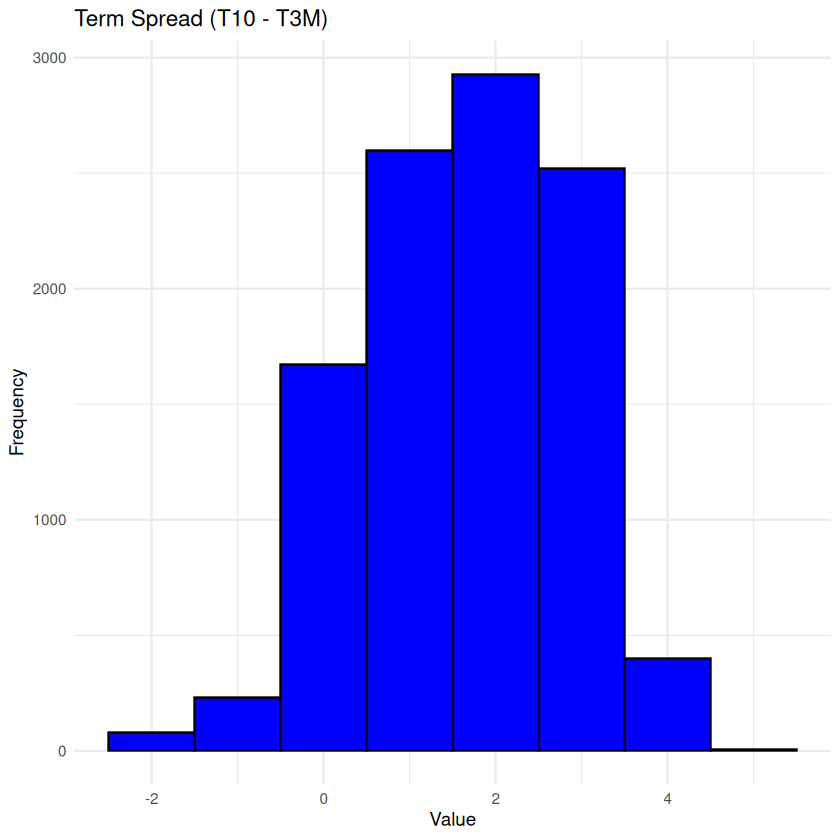

Don't know how to automatically pick scale for object of type <xts/zoo>.
Defaulting to continuous.


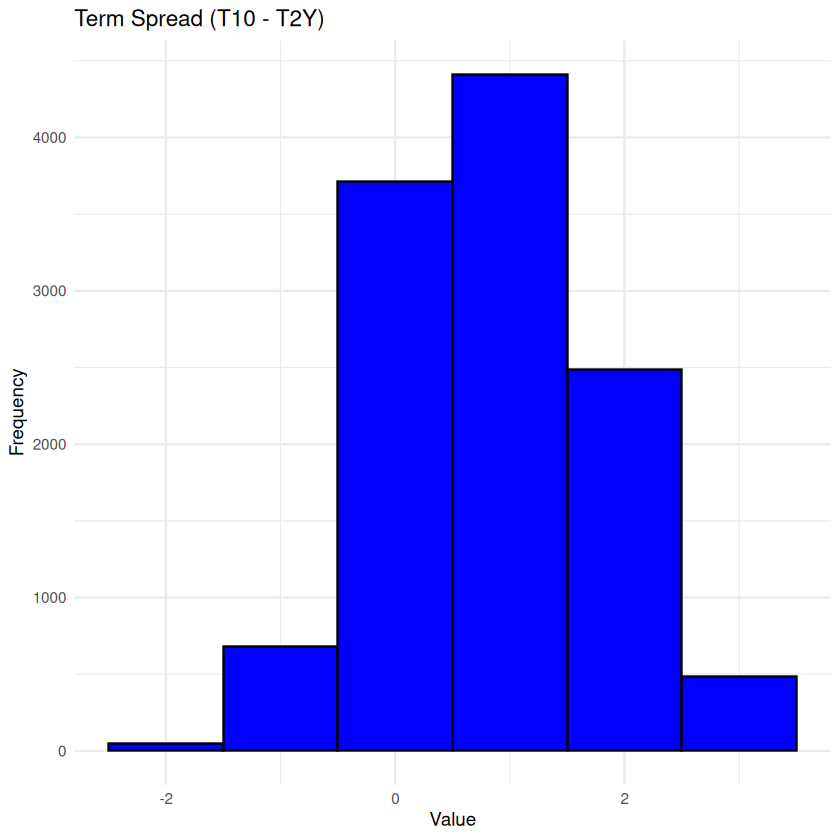

Don't know how to automatically pick scale for object of type <xts/zoo>.
Defaulting to continuous.


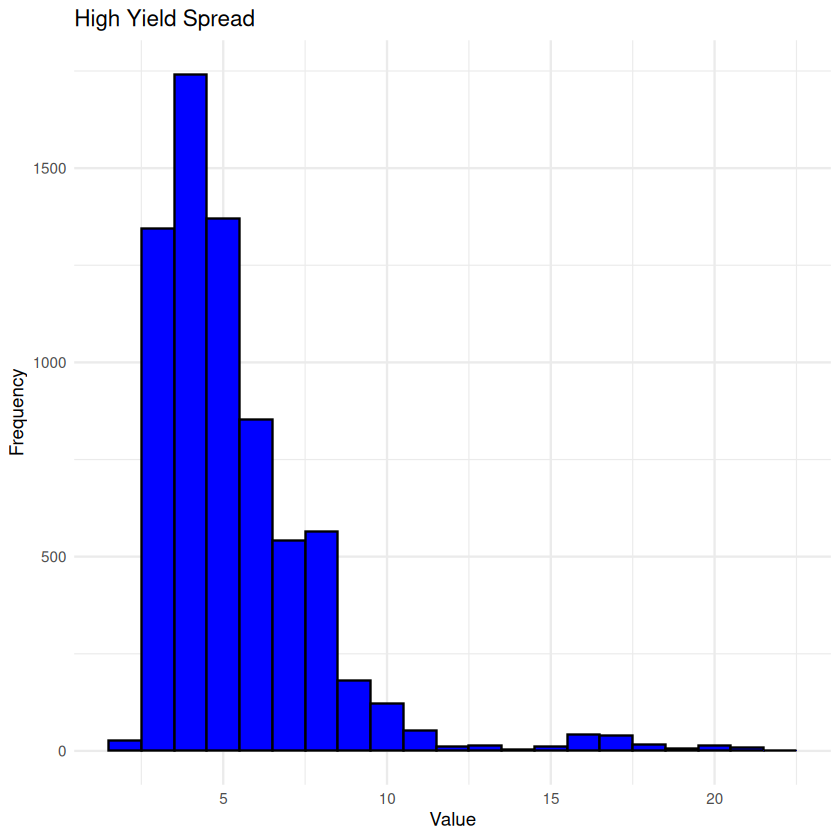

Don't know how to automatically pick scale for object of type <xts/zoo>.
Defaulting to continuous.


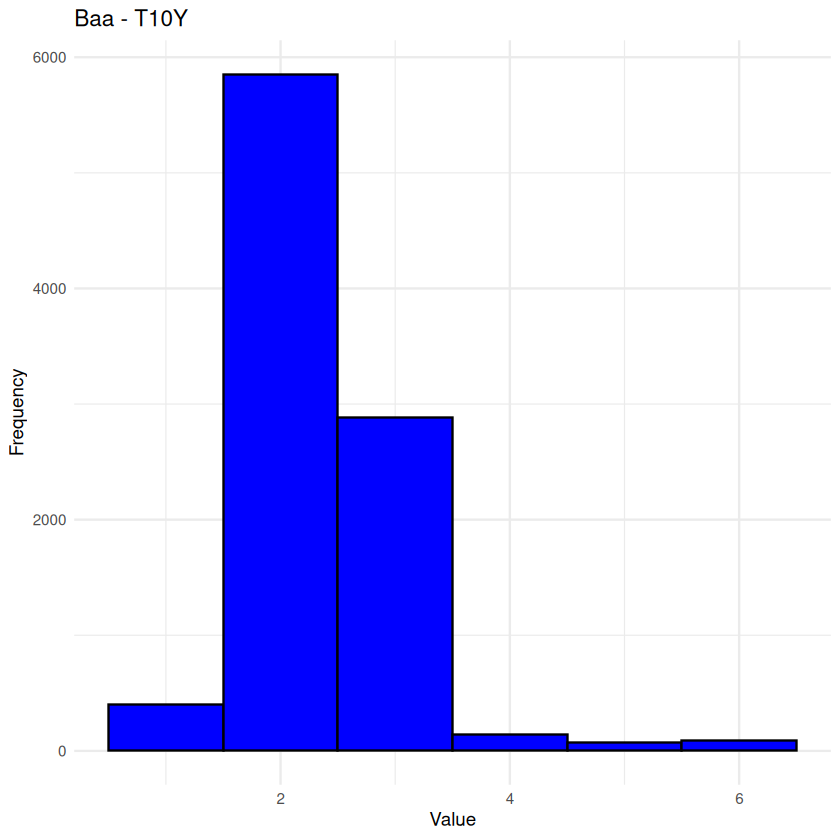

Don't know how to automatically pick scale for object of type <xts/zoo>.
Defaulting to continuous.


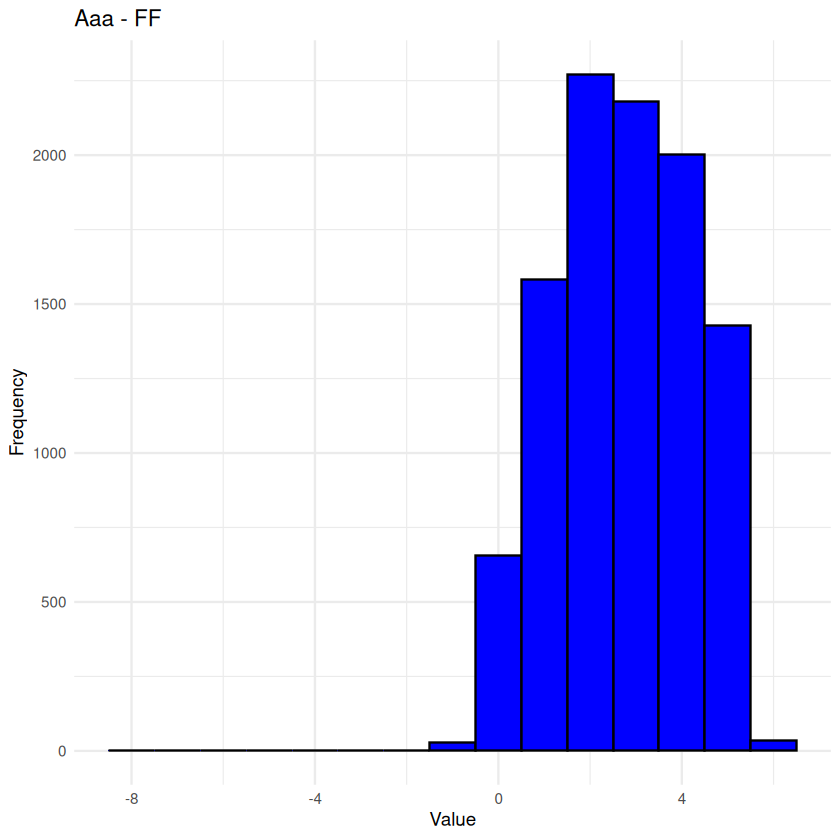

Don't know how to automatically pick scale for object of type <xts/zoo>.
Defaulting to continuous.


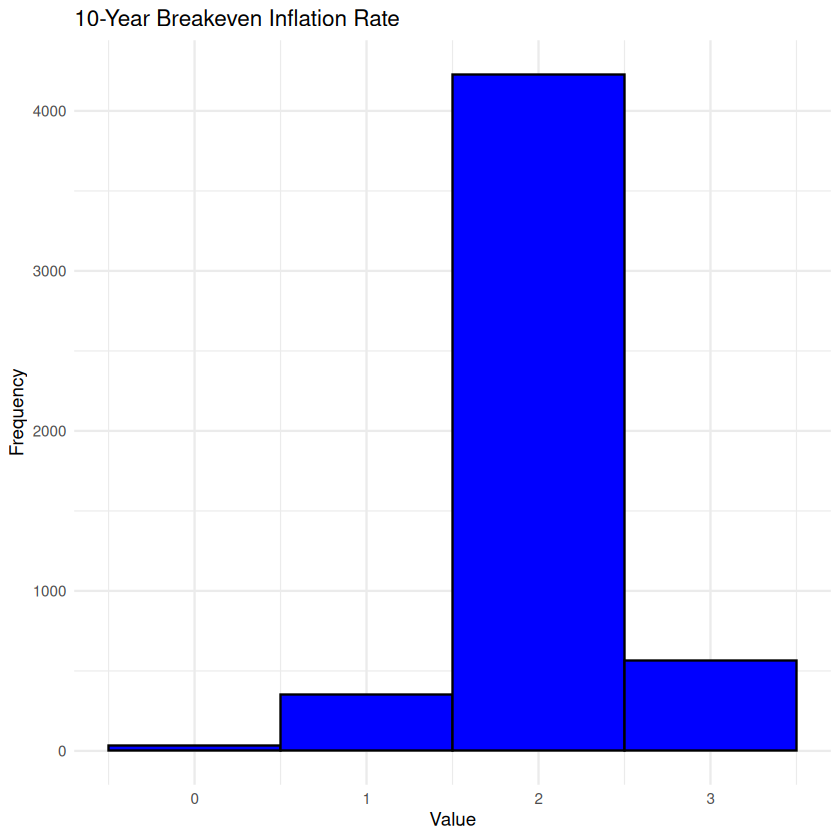

Don't know how to automatically pick scale for object of type <xts/zoo>.
Defaulting to continuous.


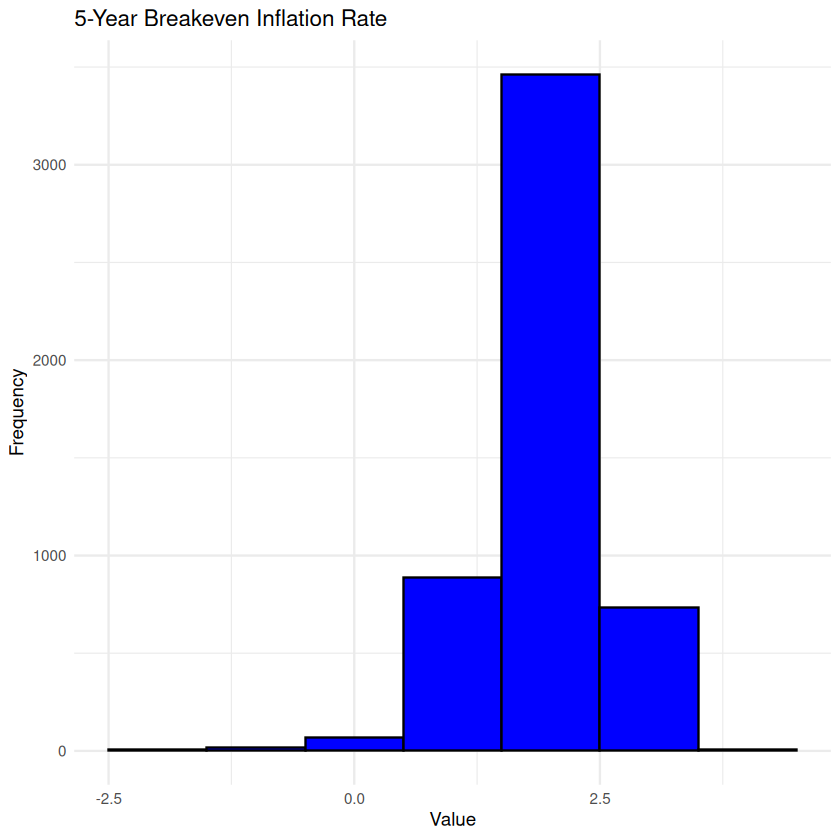

Don't know how to automatically pick scale for object of type <xts/zoo>.
Defaulting to continuous.


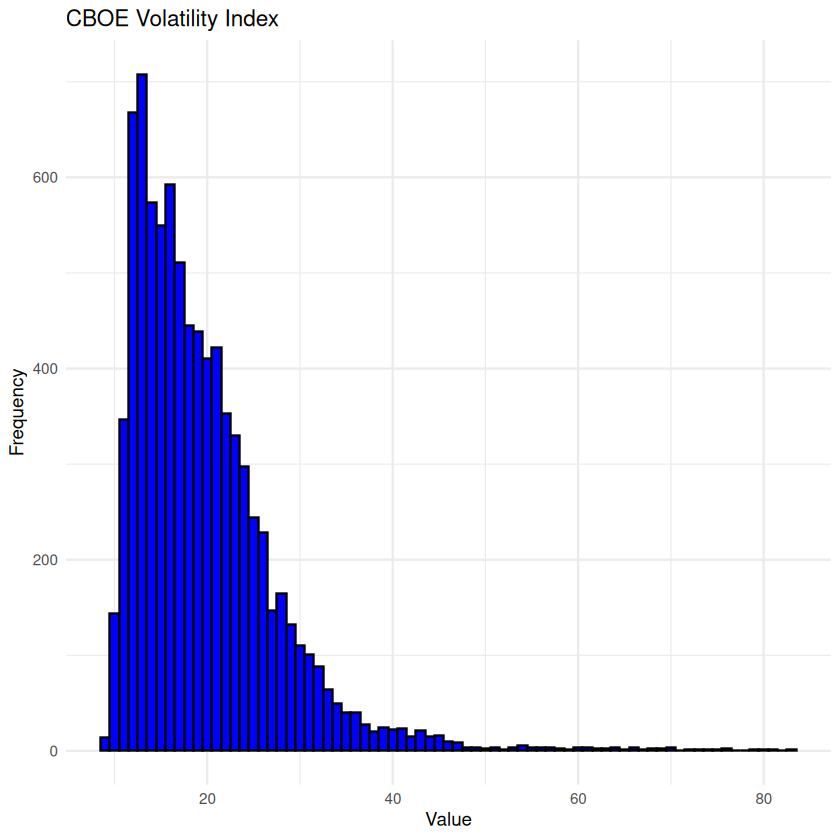

Don't know how to automatically pick scale for object of type <xts/zoo>.
Defaulting to continuous.


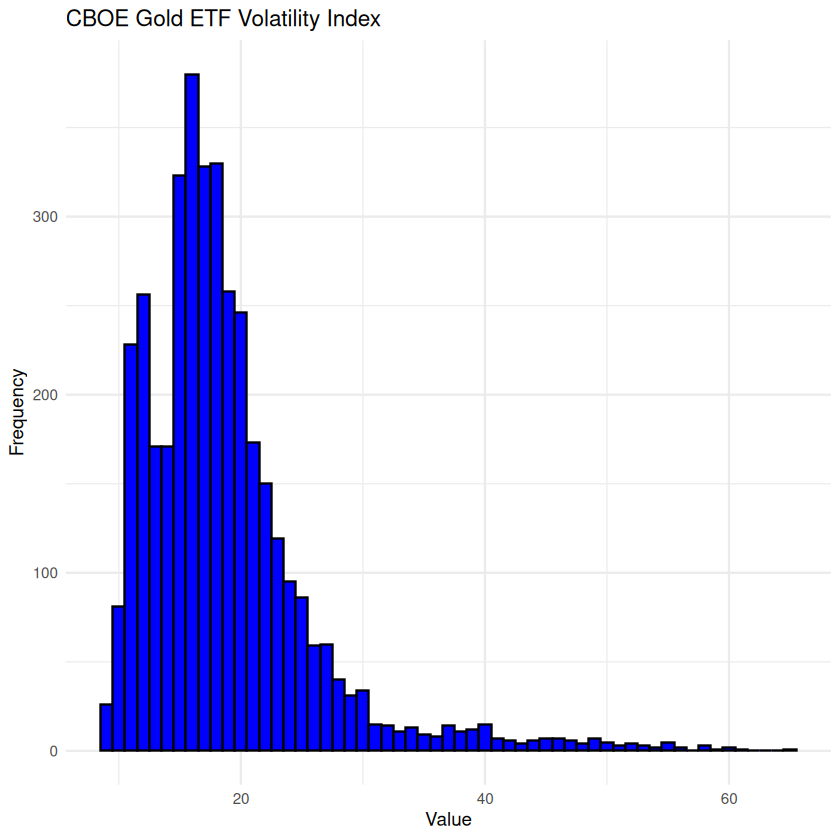

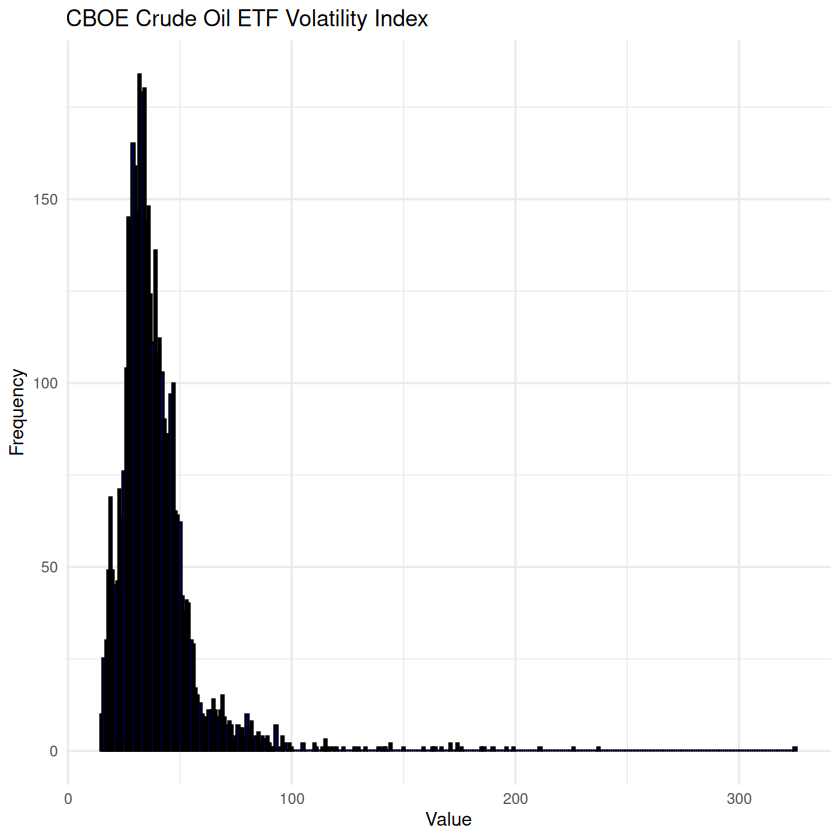

In [36]:
# Load the ggplot2 library if it's not already loaded
if (!require(ggplot2)) {
  install.packages("ggplot2")
  library(ggplot2)
}

# List of daily series
daily_series <- c(
  `T10Y3M` = "Term Spread (T10 - T3M)",
  `T10Y2Y` = "Term Spread (T10 - T2Y)",
  `HIGHYIELD_SPREAD` = "High Yield Spread",
  `BAA10Y` = "Baa - T10Y",
  `AAAFF` = "Aaa - FF",
  `T10YIE` = "10-Year Breakeven Inflation Rate",
  `T5YIE` = "5-Year Breakeven Inflation Rate",
  `VIXCLS` = "CBOE Volatility Index",
  `GVZCLS` = "CBOE Gold ETF Volatility Index",
  `OVXCLS` = "CBOE Crude Oil ETF Volatility Index"
)

# Iterate through the list of daily series and create histograms
for (series_name in names(daily_series)) {
  data <- get(series_name)  # Get the series data
  data <- na.omit(data)  # Remove rows with NaN
  series_description <- daily_series[series_name]  # Get the series description
  
  # Create a histogram
  p <- ggplot(data, aes(x = data[, 1])) +
    geom_histogram(binwidth = 1, fill = "blue", color = "black") +
    labs(title = series_description, x = "Value", y = "Frequency") +
    theme_minimal()
  
  # Print the histogram
  print(p)
}


Don't know how to automatically pick scale for object of type <xts/zoo>.
Defaulting to continuous.
Don't know how to automatically pick scale for object of type <xts/zoo>.
Defaulting to continuous.


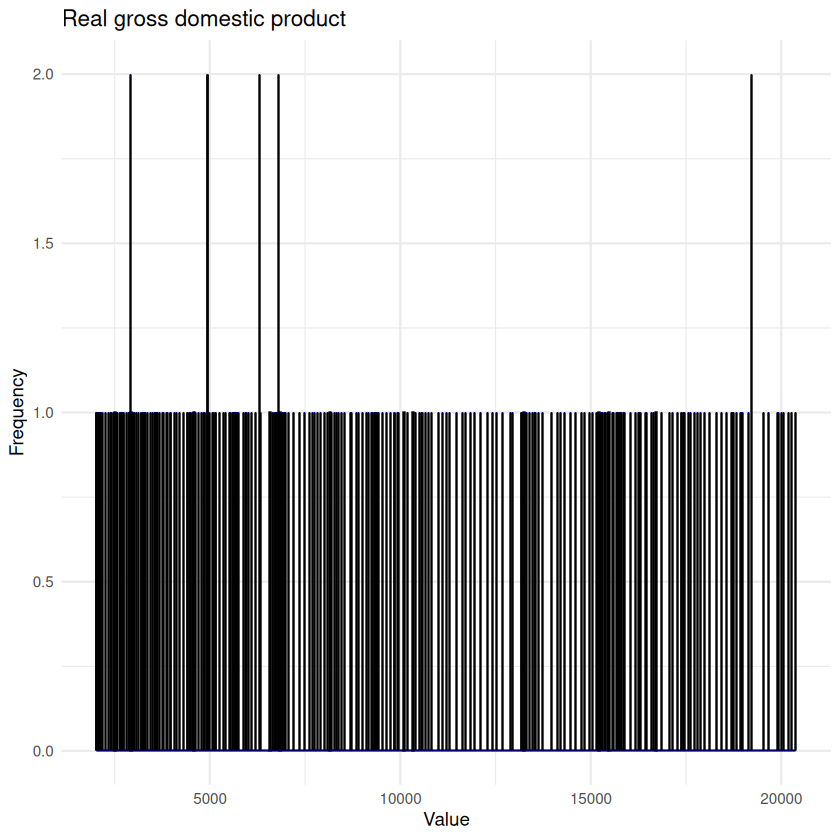

Don't know how to automatically pick scale for object of type <xts/zoo>.
Defaulting to continuous.


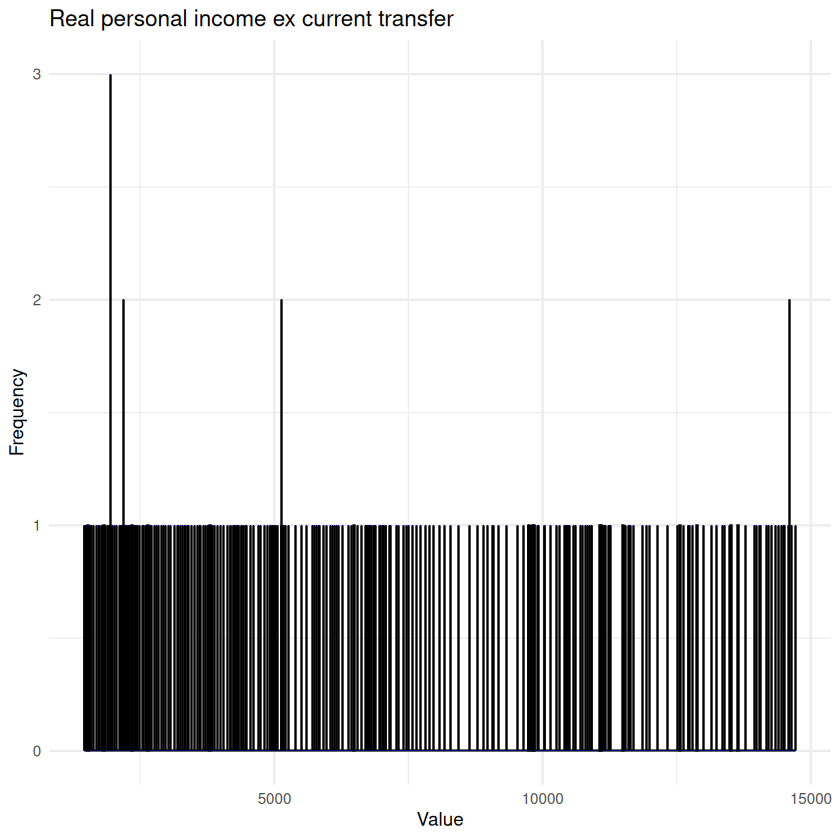

Don't know how to automatically pick scale for object of type <xts/zoo>.
Defaulting to continuous.


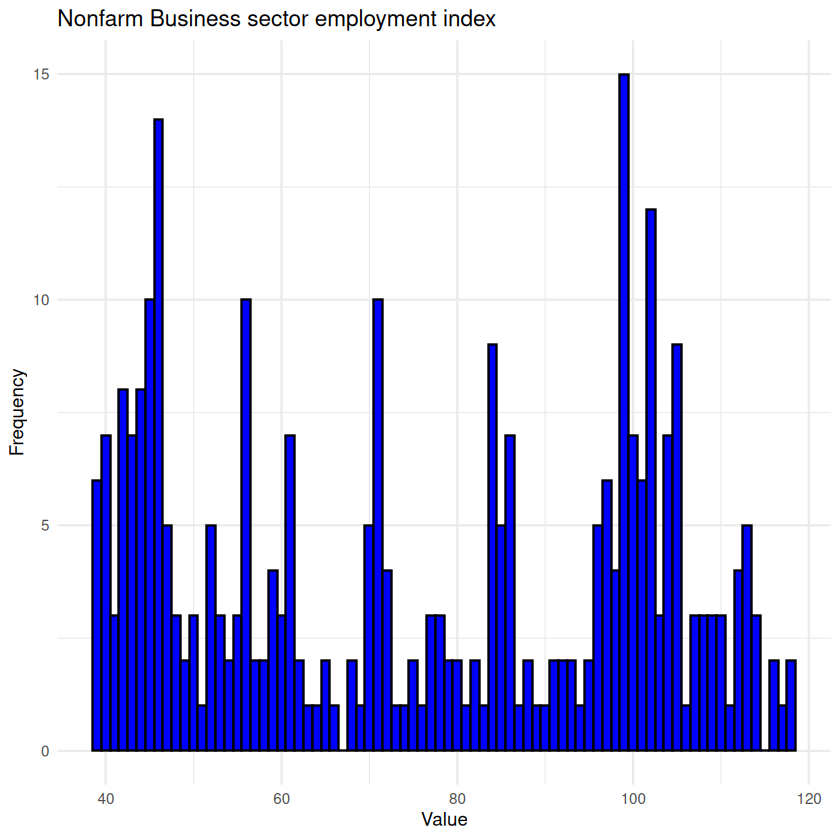

Don't know how to automatically pick scale for object of type <xts/zoo>.
Defaulting to continuous.
Warning message:
“Computation failed in `stat_bin()`
Caused by error in `bin_breaks_width()`:
! The number of histogram bins must be less than 1,000,000.
ℹ Did you make `binwidth` too small?”


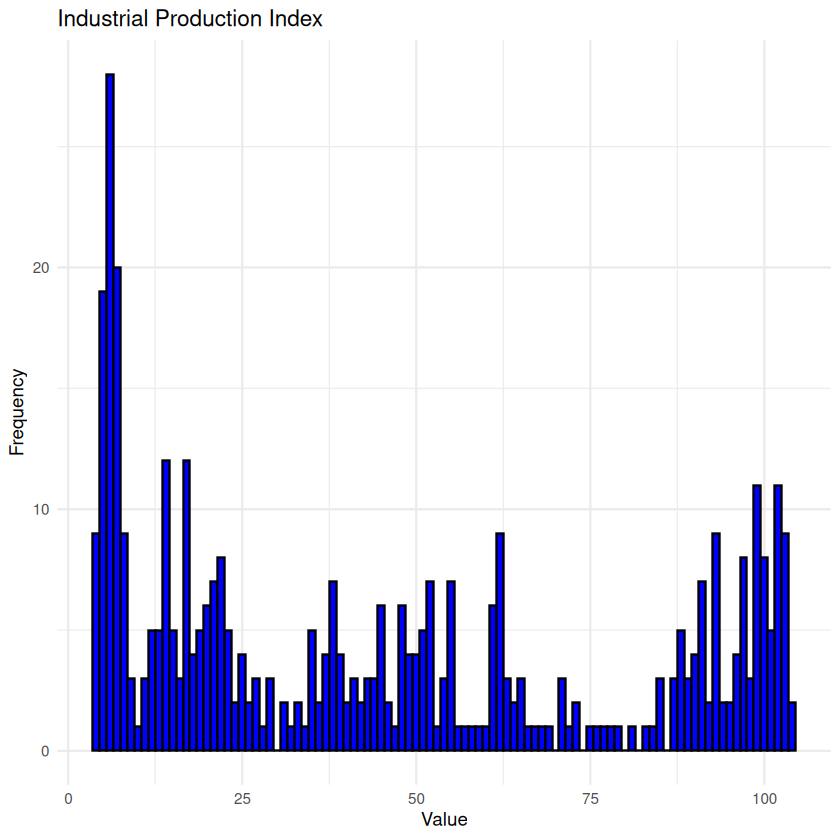

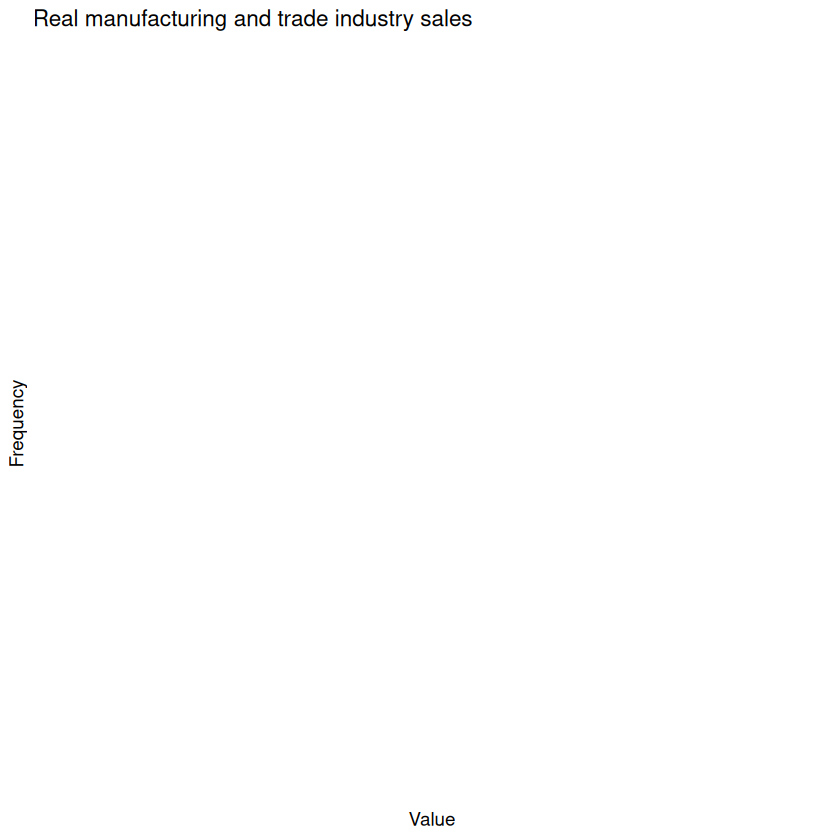

In [37]:
# Load the ggplot2 library if it's not already loaded
if (!require(ggplot2)) {
  install.packages("ggplot2")
  library(ggplot2)
}

# List of quarterly series
quarterly_series <- c(
  `GDPC1` = "Real gross domestic product",
  `PIECTR` = "Real personal income ex current transfer",
  `PRS85006013` = "Nonfarm Business sector employment index",
  `IPB50001SQ` = "Industrial Production Index",
  `CQRMTSPL` = "Real manufacturing and trade industry sales"
)

# Iterate through the list of quarterly series and create histograms
for (series_name in names(quarterly_series)) {
  data <- get(series_name)  # Get the series data
  data <- na.omit(data)  # Remove rows with NaN
  series_description <- quarterly_series[series_name]  # Get the series description
  
  # Create a histogram
  p <- ggplot(data, aes(x = data[, 1])) +
    geom_histogram(binwidth = 1, fill = "blue", color = "black") +
    labs(title = series_description, x = "Value", y = "Frequency") +
    theme_minimal()
  
  # Print the histogram
  print(p)
}


Don't know how to automatically pick scale for object of type <xts/zoo>.
Defaulting to continuous.
Don't know how to automatically pick scale for object of type <xts/zoo>.
Defaulting to continuous.


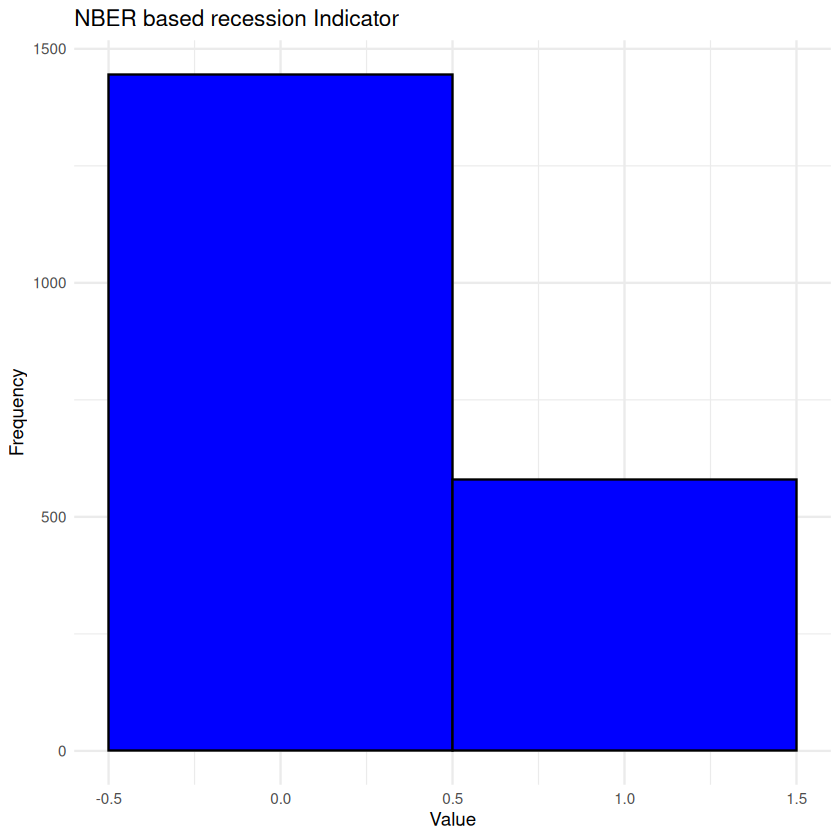

Don't know how to automatically pick scale for object of type <xts/zoo>.
Defaulting to continuous.


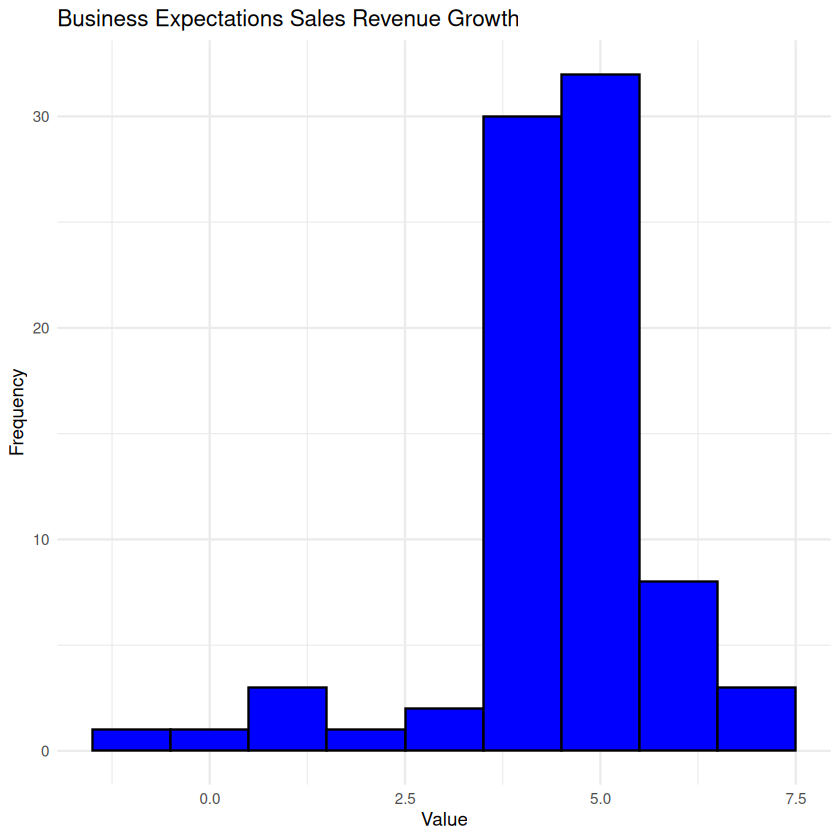

Don't know how to automatically pick scale for object of type <xts/zoo>.
Defaulting to continuous.


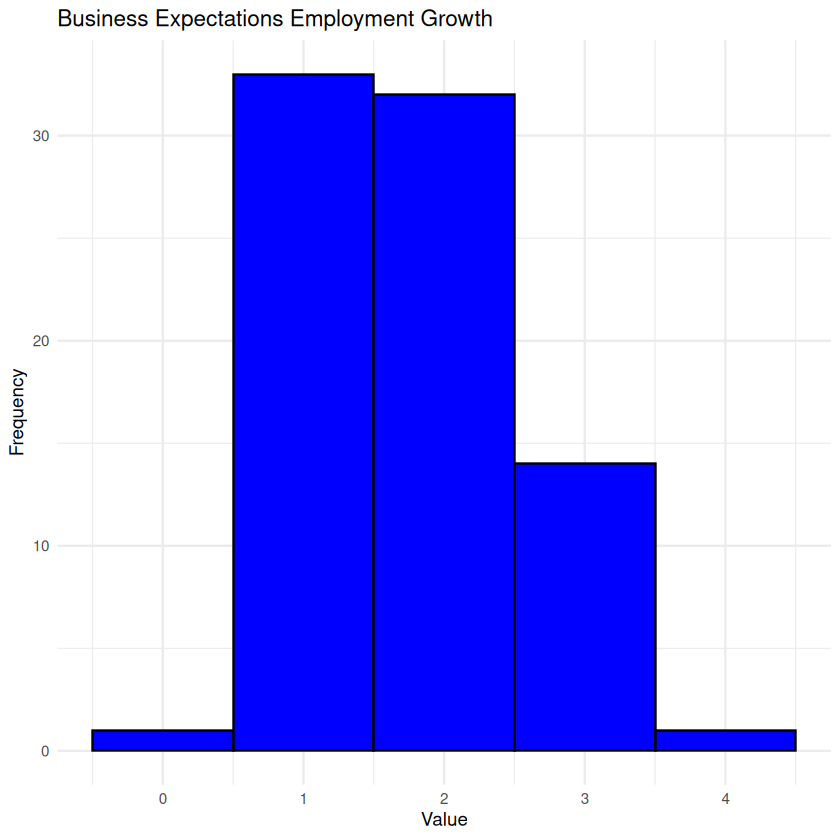

Don't know how to automatically pick scale for object of type <xts/zoo>.
Defaulting to continuous.


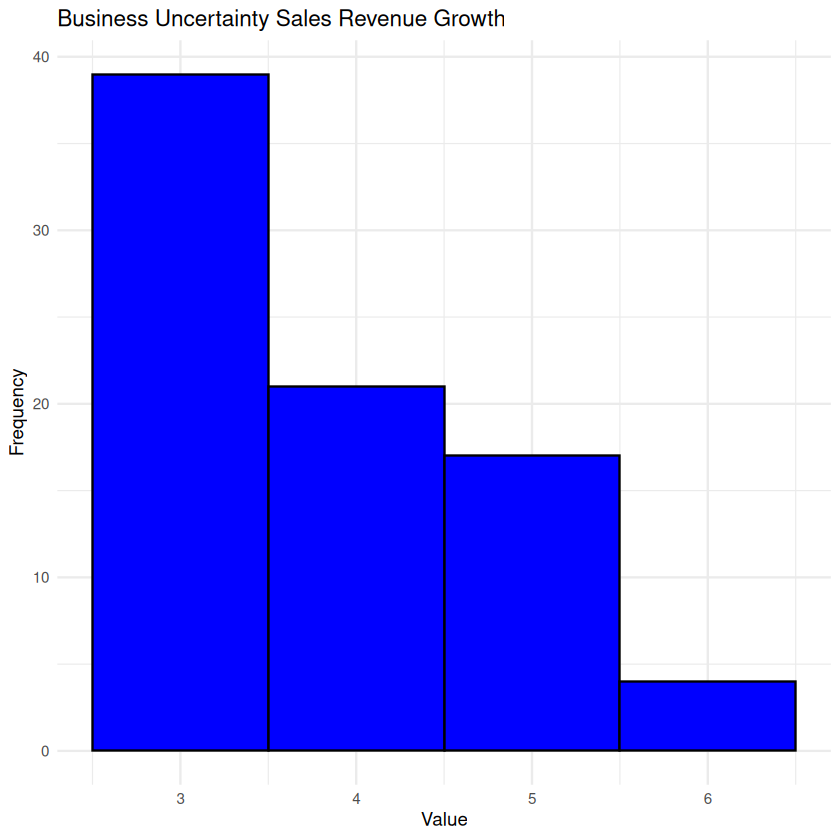

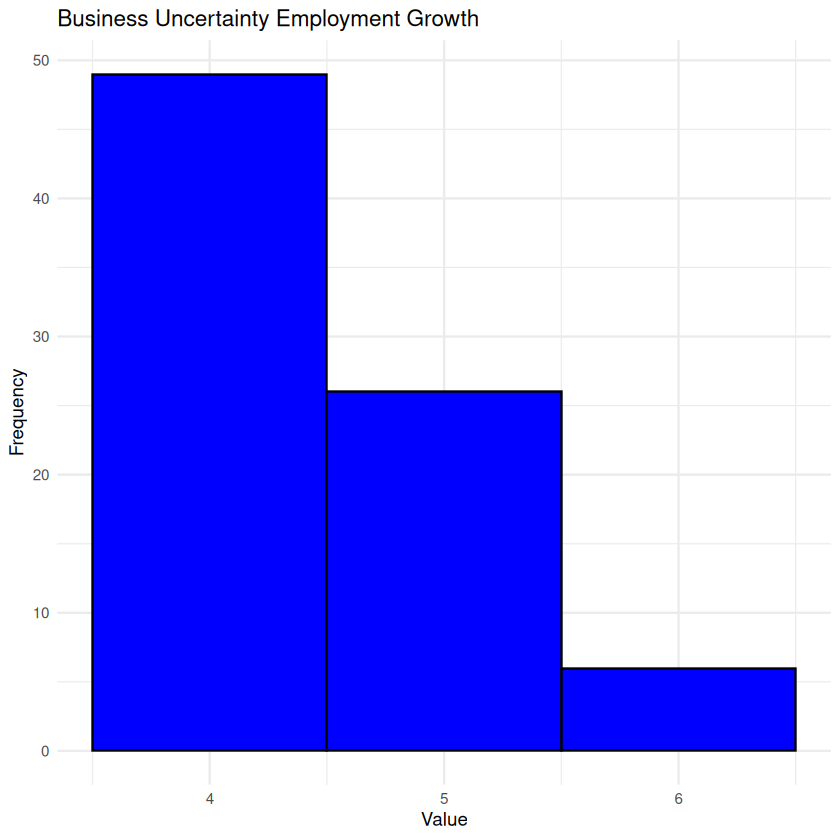

In [38]:
# Load the ggplot2 library if it's not already loaded
if (!require(ggplot2)) {
  install.packages("ggplot2")
  library(ggplot2)
}

# List of monthly series
monthly_series <- c(
  `USREC` = "NBER based recession Indicator",
  `ATLSBUSRGEP` = "Business Expectations Sales Revenue Growth",
  `ATLSBUEGEP` = "Business Expectations Employment Growth",
  `ATLSBUSRGUP` = "Business Uncertainty Sales Revenue Growth",
  `ATLSBUEGUP` = "Business Uncertainty Employment Growth"
)

# Iterate through the list of monthly series and create histograms
for (series_name in names(monthly_series)) {
  data <- get(series_name)  # Get the series data
  data <- na.omit(data)  # Remove rows with NaN
  series_description <- monthly_series[series_name]  # Get the series description
  
  # Create a histogram
  p <- ggplot(data, aes(x = data[, 1])) +
    geom_histogram(binwidth = 1, fill = "blue", color = "black") +
    labs(title = series_description, x = "Value", y = "Frequency") +
    theme_minimal()
  
  # Print the histogram
  print(p)
}


In [42]:
# Load necessary libraries
if (!require(dplyr)) {
  install.packages("dplyr")
  library(dplyr)
}
if (!require(corrplot)) {
  install.packages("corrplot")
  library(corrplot)
}

# List of daily series
daily_series <- c(
  T10Y3M = "Term Spread (T10 - T3M)",
  T10Y2Y = "Term Spread (T10 - T2Y)",
  HIGHYIELD_SPREAD = "High Yield Spread",
  BAA10Y = "Baa - T10Y",
  AAAFF = "Aaa - FF",
  T10YIE = "10-Year Breakeven Inflation Rate",
  T5YIE = "5-Year Breakeven Inflation Rate",
  VIXCLS = "CBOE Volatility Index",
  GVZCLS = "CBOE Gold ETF Volatility Index",
  OVXCLS = "CBOE Crude Oil ETF Volatility Index"
)

# List of monthly series
monthly_series <- c(
  USREC = "NBER based recession Indicator",
  ATLSBUSRGEP = "Business Expectations Sales Revenue Growth",
  ATLSBUEGEP = "Business Expectations Employment Growth",
  ATLSBUSRGUP = "Business Uncertainty Sales Revenue Growth",
  ATLSBUEGUP = "Business Uncertainty Employment Growth"
)

# List of quarterly series
quarterly_series <- c(
  GDPC1 = "Real gross domestic product",
  PIECTR = "Real personal income ex current transfer",
  PRS85006013 = "Nonfarm Business sector employment index",
  IPB50001SQ = "Industrial Production Index",
  CQRMTSPL = "Real manufacturing and trade industry sales"
)

# Function to create and plot correlation matrix for a list of series
plotCorrelationMatrix <- function(series_list, title) {
  # Create a data frame with selected series
  data_df <- data.frame(lapply(series_list, get))
  colnames(data_df) <- names(series_list)
  
  # Calculate the correlation matrix
  corr_matrix <- cor(data_df)
  
  # Plot the correlation matrix (upper triangle only)
  corrplot(corr_matrix, method = "circle", type = "upper", tl.pos = "lt", title = title)
}

# Plot correlation matrix for daily series
plotCorrelationMatrix(daily_series, title = "Daily Series")

# Plot correlation matrix for monthly series
plotCorrelationMatrix(monthly_series, title = "Monthly Series")

# Plot correlation matrix for quarterly series
plotCorrelationMatrix(quarterly_series, title = "Quarterly Series")


ERROR: Error in FUN(X[[i]], ...): object 'Term Spread (T10 - T3M)' not found


In [44]:
# Extract the daily series columns
daily_series_columns <- c("T10Y3M", "T10Y2Y", "HIGHYIELD_SPREAD", "BAA10Y", "AAAFF", "T10YIE", "T5YIE", "VIXCLS", "GVZCLS", "OVXCLS")
daily_merged_data <- merged_data[, daily_series_columns]

# Extract the monthly series columns
monthly_series_columns <- c("USREC", "ATLSBUSRGEP", "ATLSBUEGEP", "ATLSBUSRGUP", "ATLSBUEGUP")
monthly_merged_data <- merged_data[, monthly_series_columns]

# Extract the quarterly series columns
quarterly_series_columns <- c("GDPC1", "PIECTR", "PRS85006013", "IPB50001SQ", "CQRMTSPL")
quarterly_merged_data <- merged_data[, quarterly_series_columns]

# Print the first few rows of each dataframe
head(daily_merged_data)
head(monthly_merged_data)
head(quarterly_merged_data)


ERROR: Error in `[.xts`(merged_data, , daily_series_columns): subscript out of bounds
